# Neural Networks - Learning PyTorch

In the last notebook, we learned about `Datasets`, `DataLoaders` and `Tranforms`. Now, we are going to begin the vast journey of `Neural Networks`. 

As the name suggests, it is trying to mimic the brain, it has neurons (perceptrons) which are the fundamental computing block. Neural Network consists of layers/modules that performs operations on the data. 

Let's get started. 

In [1]:
# Importing Libraries
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 1. Getting Device for Training
It is always better to train our model on a hardware accelerator such as "CUDA" or "MPS". I am running this from a Mac M1, so I know that I have "MPS". Let us check

In [2]:
device = ("mps" if torch.backends.mps.is_available() else "cpu")
print(f"We are using {device}")

We are using mps


## 2. Defining the Class 
We can define neural networks by subclassing `nn.Module` and initializing the neural network layers in the `__init__` function. 

> Every `nn.Module` subclass implements the operations on input data in the forward method.

Let us look at the training data and testing data, Neural Networks all have a reson for their structure. People are not making things up (layers sizes) as they go. 

In [4]:
training_data = datasets.OxfordIIITPet(
    root="data",
    split = "trainval",
    download=True,
    transform= transforms.ToTensor()
)

test_data = datasets.OxfordIIITPet(
    root="data",
    split = "test",
    download=True,
    transform= transforms.ToTensor()
)

In [5]:
training_data

Dataset OxfordIIITPet
    Number of datapoints: 3680
    Root location: data
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset OxfordIIITPet
    Number of datapoints: 3669
    Root location: data
    StandardTransform
Transform: ToTensor()

Let us print out the image sizes, to observe if they all have the same image shapes or do they differ.

In [13]:
def print_image_size(dataset_obj, num_of_images):
    for i in range(num_of_images):
        sample_idx = torch.randint(len(dataset_obj), size = (1,)).item()
        img, label = dataset_obj[sample_idx]
        print(f"Image {i}: {img.shape}")

In [14]:
print_image_size(training_data, 10)

Image 0: torch.Size([3, 500, 469])
Image 1: torch.Size([3, 327, 500])
Image 2: torch.Size([3, 333, 500])
Image 3: torch.Size([3, 333, 500])
Image 4: torch.Size([3, 202, 300])
Image 5: torch.Size([3, 333, 500])
Image 6: torch.Size([3, 300, 216])
Image 7: torch.Size([3, 375, 500])
Image 8: torch.Size([3, 385, 500])
Image 9: torch.Size([3, 420, 500])


As we can observe, the image shapes are very different. Only the colour channel is remaining the same, others are very different. We should have a way to send uniform image shape into our neural network. Let's also test the image shapes in Test Data.

In [15]:
print_image_size(test_data, 10)

Image 0: torch.Size([3, 500, 457])
Image 1: torch.Size([3, 500, 334])
Image 2: torch.Size([3, 332, 500])
Image 3: torch.Size([3, 375, 500])
Image 4: torch.Size([3, 447, 500])
Image 5: torch.Size([3, 500, 333])
Image 6: torch.Size([3, 375, 500])
Image 7: torch.Size([3, 334, 500])
Image 8: torch.Size([3, 375, 500])
Image 9: torch.Size([3, 332, 500])


There is apparently a `Resize` function in pytorch, which will convert all the tensors to the desired shape. 

In [17]:
X = torch.rand(1, 28, 28)
X.shape

torch.Size([1, 28, 28])

Looks like we can transform the input data, when we are loading them. So, we can create a `transformations` object which can store all our transformation and check it out. 

In [24]:
transformations = transforms.Compose([
    transforms.Resize([512, 512]),
    transforms.ToTensor()
])

In [25]:
training_data = datasets.OxfordIIITPet(
    root="data",
    split = "trainval",
    download=True,
    transform= transformations
)

test_data = datasets.OxfordIIITPet(
    root="data",
    split = "test",
    download=True,
    transform= transformations
)

In [26]:
print_image_size(training_data, 10)

Image 0: torch.Size([3, 512, 512])
Image 1: torch.Size([3, 512, 512])
Image 2: torch.Size([3, 512, 512])
Image 3: torch.Size([3, 512, 512])
Image 4: torch.Size([3, 512, 512])
Image 5: torch.Size([3, 512, 512])
Image 6: torch.Size([3, 512, 512])
Image 7: torch.Size([3, 512, 512])
Image 8: torch.Size([3, 512, 512])
Image 9: torch.Size([3, 512, 512])


In [27]:
print_image_size(test_data, 10)

Image 0: torch.Size([3, 512, 512])
Image 1: torch.Size([3, 512, 512])
Image 2: torch.Size([3, 512, 512])
Image 3: torch.Size([3, 512, 512])
Image 4: torch.Size([3, 512, 512])
Image 5: torch.Size([3, 512, 512])
Image 6: torch.Size([3, 512, 512])
Image 7: torch.Size([3, 512, 512])
Image 8: torch.Size([3, 512, 512])
Image 9: torch.Size([3, 512, 512])


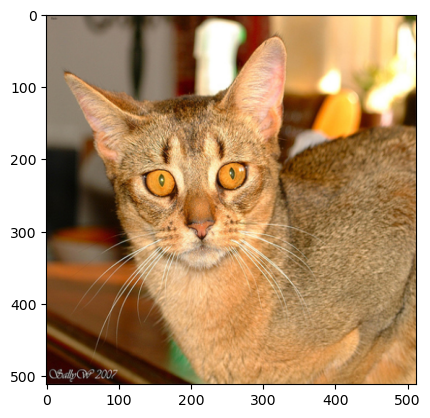

In [36]:
import matplotlib.pyplot as plt


img, label = training_data[2]
print(f"Image Shap")
plt.imshow(img.permute(1,2,0))